# Exploratory Data Analysis

## Paso 1. Carga del conjunto de datos

In [24]:
# Your code here
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [26]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Al realizar una primera revisión de los datos, se puede identificar que hay datos que no son necesarios, por lo que se eliminarán esas columnas:

In [27]:
df.drop(['id', 'name', 'host_id', 'host_name', 'latitude', 'longitude'], axis=1, inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   room_type                       48895 non-null  object 
 3   price                           48895 non-null  int64  
 4   minimum_nights                  48895 non-null  int64  
 5   number_of_reviews               48895 non-null  int64  
 6   last_review                     38843 non-null  object 
 7   reviews_per_month               38843 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 3.7+ MB


También, se convertirán algunas variables de categoricas a númericas, antes se considerará cuántos valores posibles tiene cada variable:

In [29]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [30]:
df['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [31]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

Como se observa, nos es mucho más útil tener agrupados los vencindarios en "neighbourhood_group", más que tener el total de los vecindarios en "neighbourhood", por lo que se eliminará esta última:

In [32]:
df.drop(['neighbourhood'], axis=1, inplace=True)

Con el resto de las variables, se pasará de variables categóricas a variables numéricas, por conveniencia del análisis:

In [33]:
# Variable neighbourhood_group
df['neighbourhood_group'] = df['neighbourhood_group'].replace({'Brooklyn': 1, 'Manhattan': 2, 'Queens':3, 'Staten Island':4, 'Bronx':5})

# Variable room_type
df['room_type'] = df['room_type'].replace({'Private room': 1, 'Entire home/apt': 2, 'Shared room':3 })

/tmp/ipykernel_1118/2338105087.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['neighbourhood_group'] = df['neighbourhood_group'].replace({'Brooklyn': 1, 'Manhattan': 2, 'Queens':3, 'Staten Island':4, 'Bronx':5})
/tmp/ipykernel_1118/2338105087.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['room_type'] = df['room_type'].replace({'Private room': 1, 'Entire home/apt': 2, 'Shared room':3 })


## Paso 2. Realizar EDA completo.

### Análisis univariable

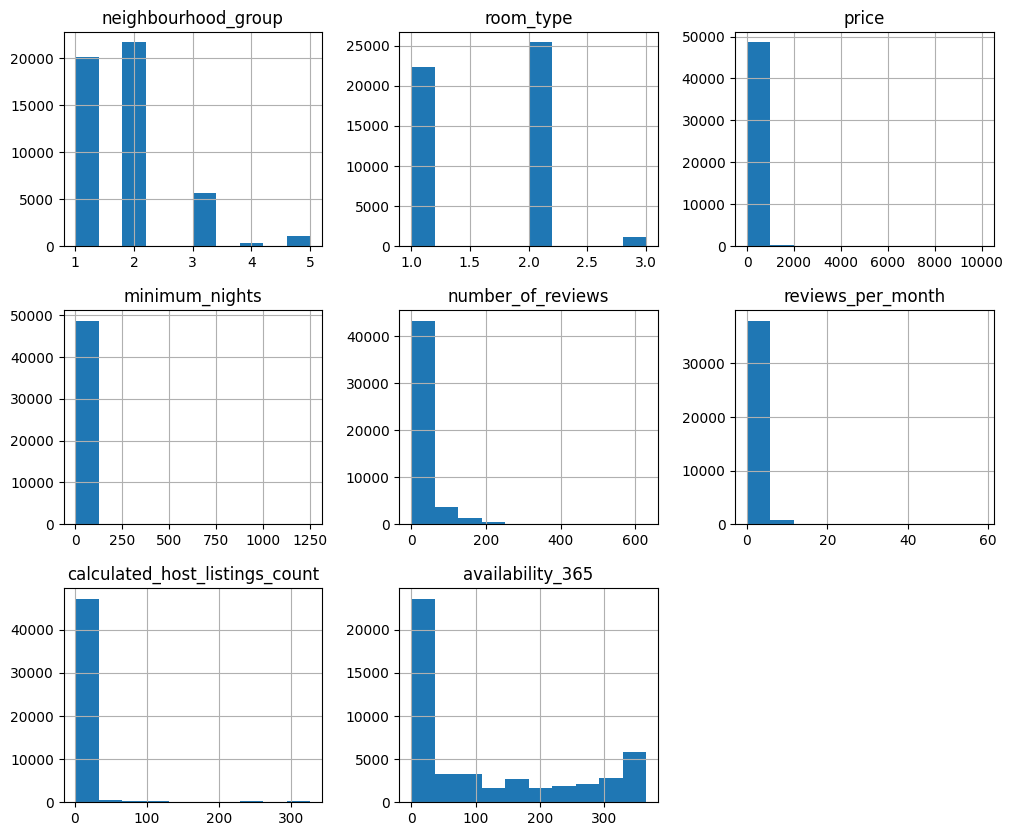

In [34]:
import matplotlib.pyplot as plt


df.hist(figsize=(12,10))
plt.show()

En las gráficas de arriba, se puede observar que hay bastantes outliers, por lo que se considerá si es conveniente eliminarlos, considerando que no representen más del 5% de los datos:

### Análisis de Outliers

<Axes: xlabel='price'>

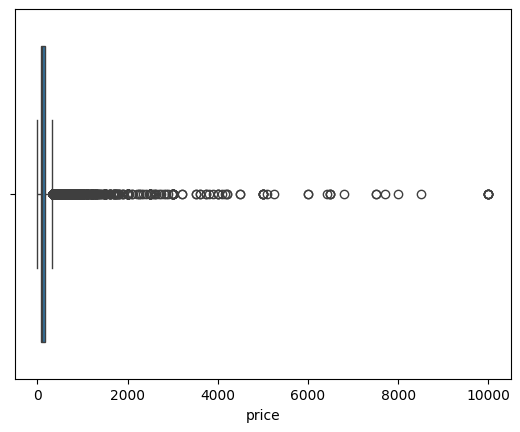

In [35]:
import seaborn as sns

sns.boxplot(x=df["price"])

<Axes: xlabel='minimum_nights'>

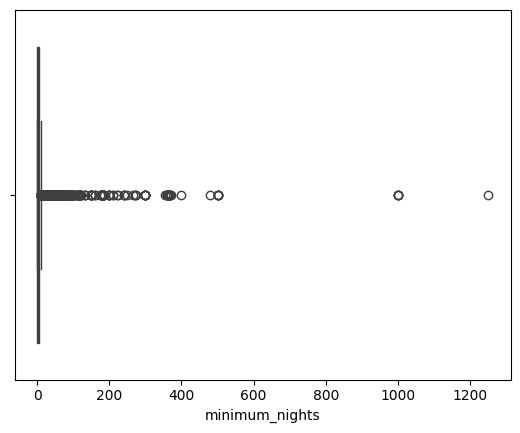

In [36]:
sns.boxplot(x=df["minimum_nights"])

<Axes: xlabel='number_of_reviews'>

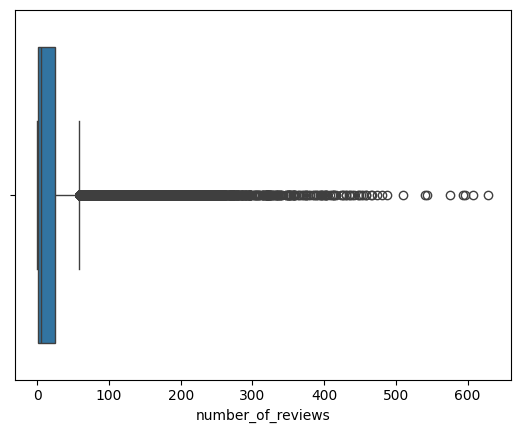

In [37]:
sns.boxplot(x=df["number_of_reviews"])

<Axes: xlabel='reviews_per_month'>

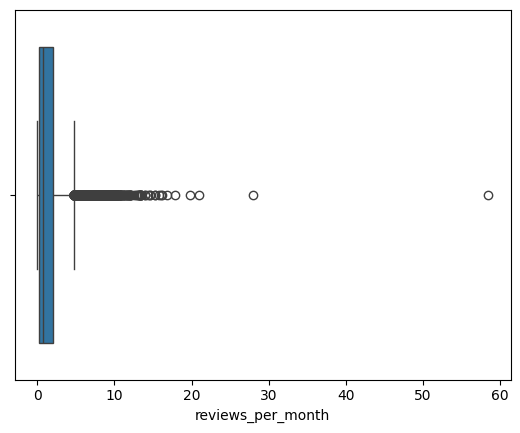

In [38]:
sns.boxplot(x=df["reviews_per_month"])

<Axes: xlabel='calculated_host_listings_count'>

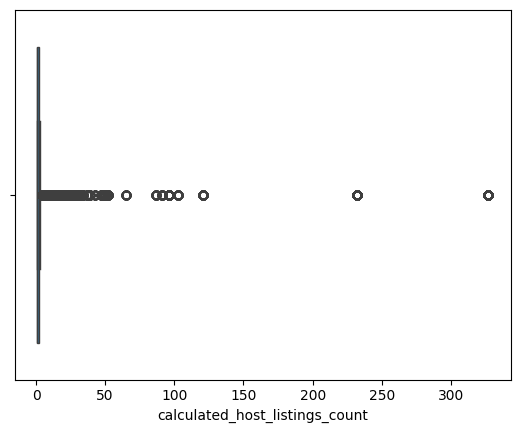

In [39]:
sns.boxplot(x=df["calculated_host_listings_count"])

### Nota sobre outliers:  
Como se observa en las boxplots, los outliers representan una gran cantidad de la información disponible, aunque podemos validar lo anterior gráficamente, se realizarán algunas operaciones para validar en que casos los outliers representan más del `5%` de los datos, en tal caso, no podrán ser eliminados, en el caso contrario se podrán eliminar:

In [40]:
# Calculo del 5% del total de los datos
five_percent = 48895 * 0.05
five_percent

2444.75

In [41]:
data_price = df['price']
data_mn = df['minimum_nights']
data_nr = df['number_of_reviews']
data_rm = df['reviews_per_month']
data_chlc = df['calculated_host_listings_count']

In [42]:
def find_outliers_IQR(dataf):
   q1=dataf.quantile(0.25)
   q3=dataf.quantile(0.75)
   IQR=q3-q1
   outliers = dataf[((dataf<(q1-1.5*IQR)) | (dataf>(q3+1.5*IQR)))]
   min_outlier = min(outliers)
   number_of_outlier = len(dataf[dataf > min_outlier])
   
   return number_of_outlier

total_outliers_p = find_outliers_IQR(data_price)
total_outliers_mn= find_outliers_IQR(data_mn)
total_outliers_nr= find_outliers_IQR(data_nr)
total_outliers_rm= find_outliers_IQR(data_rm)
total_outliers_chlc= find_outliers_IQR(data_chlc)


def is_eliminated_outlier(all_outliers, variable):
   if all_outliers >= five_percent:
      print(f'❌ Con {all_outliers}, No es posible eliminar los outliers de {variable}, pues representan más del 5% de los datos.')
   elif all_outliers < five_percent:
      print(f'✅ Con {all_outliers}, Es posible eliminar los outliers de {variable}, pues representan menos del 5% de los datos.')

is_eliminated_outlier(total_outliers_p, "price")
is_eliminated_outlier(total_outliers_mn, "minimum_nights")
is_eliminated_outlier(total_outliers_nr, "number_of_reviews")
is_eliminated_outlier(total_outliers_rm, "reviews_per_month")
is_eliminated_outlier(total_outliers_chlc, "calculated_host_listings_count")



❌ Con 2964, No es posible eliminar los outliers de price, pues representan más del 5% de los datos.
❌ Con 6516, No es posible eliminar los outliers de minimum_nights, pues representan más del 5% de los datos.
❌ Con 5890, No es posible eliminar los outliers de number_of_reviews, pues representan más del 5% de los datos.
✅ Con 1780, Es posible eliminar los outliers de reviews_per_month, pues representan menos del 5% de los datos.
❌ Con 5641, No es posible eliminar los outliers de calculated_host_listings_count, pues representan más del 5% de los datos.


### Conclusión (Análisis de Outliers):  
El cálculo anterior, nos mostró que la única variable de la que se pueden eliminar los outliers es `reviews_per_month`, pues sus valores atípicos representan menos del 5% del total de la información, sin embargo, se decidirá no eliminarlos, ya que al tratarse del conteo de reviews por mes, es totalmente posible que haya meses con muchos más comentarios recibidos.

### Análisis Bivariado

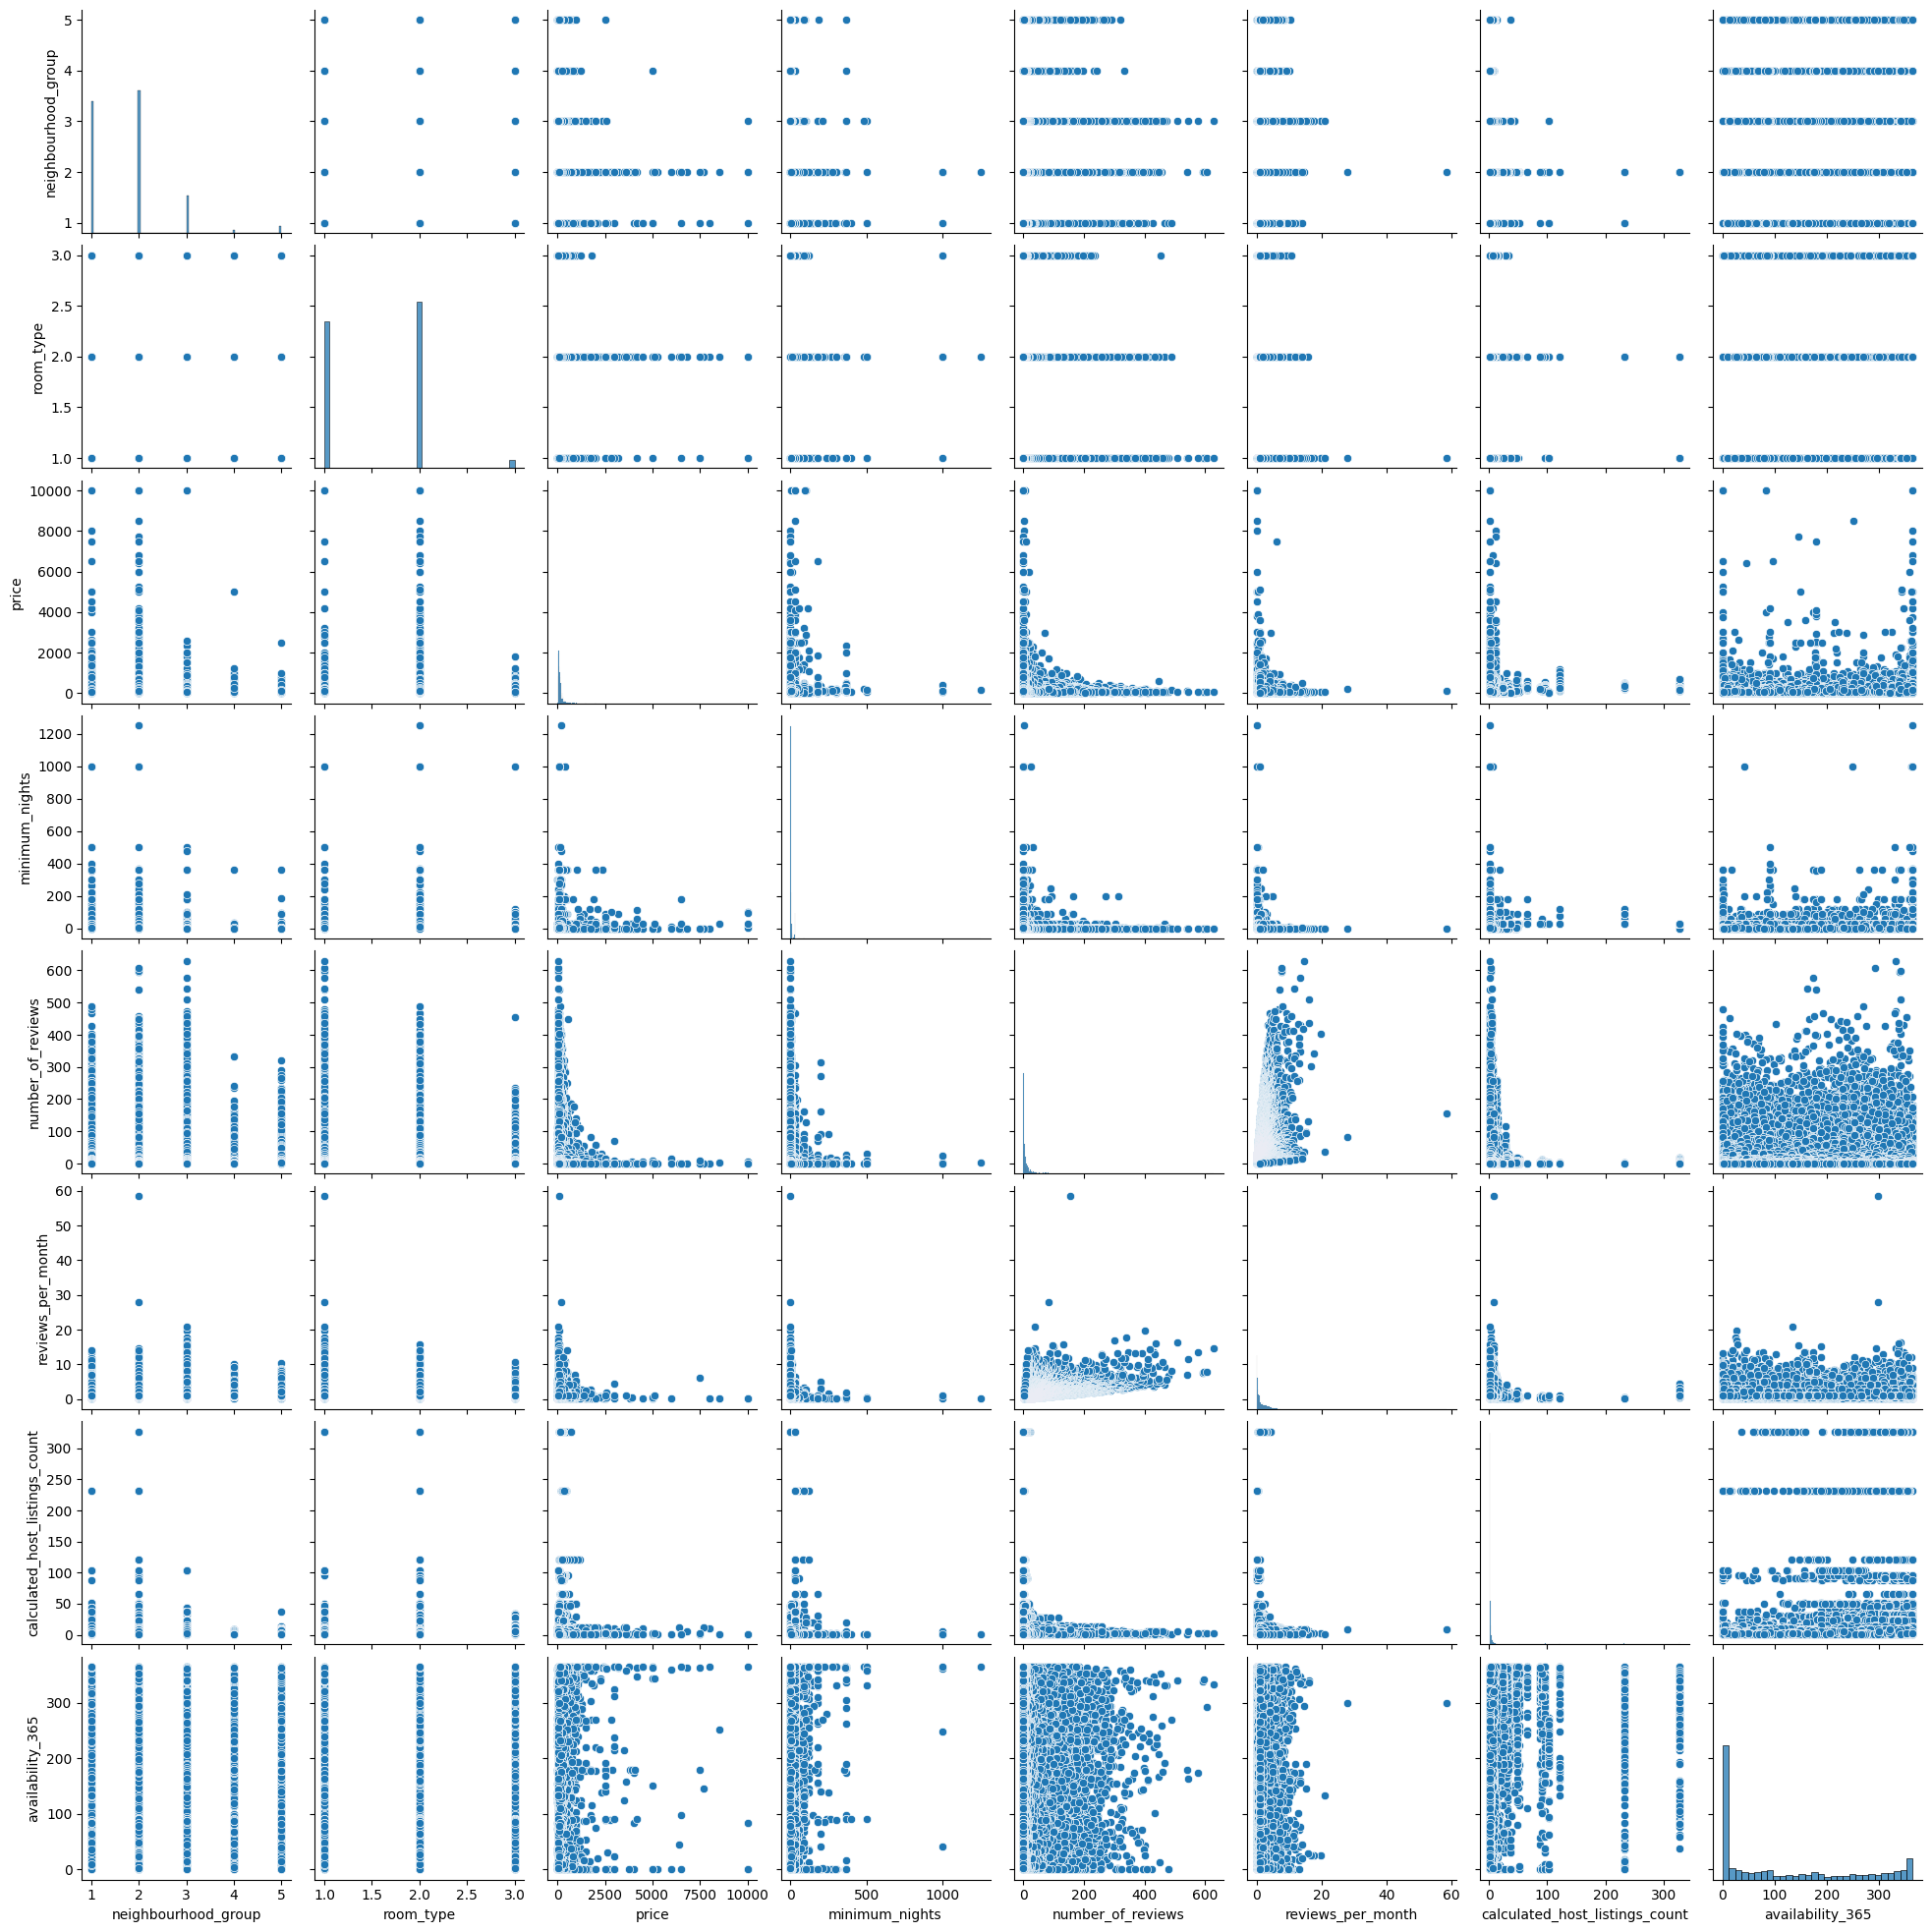

In [43]:
sns.pairplot(df)

Se busca alguna correlación entre las variables:

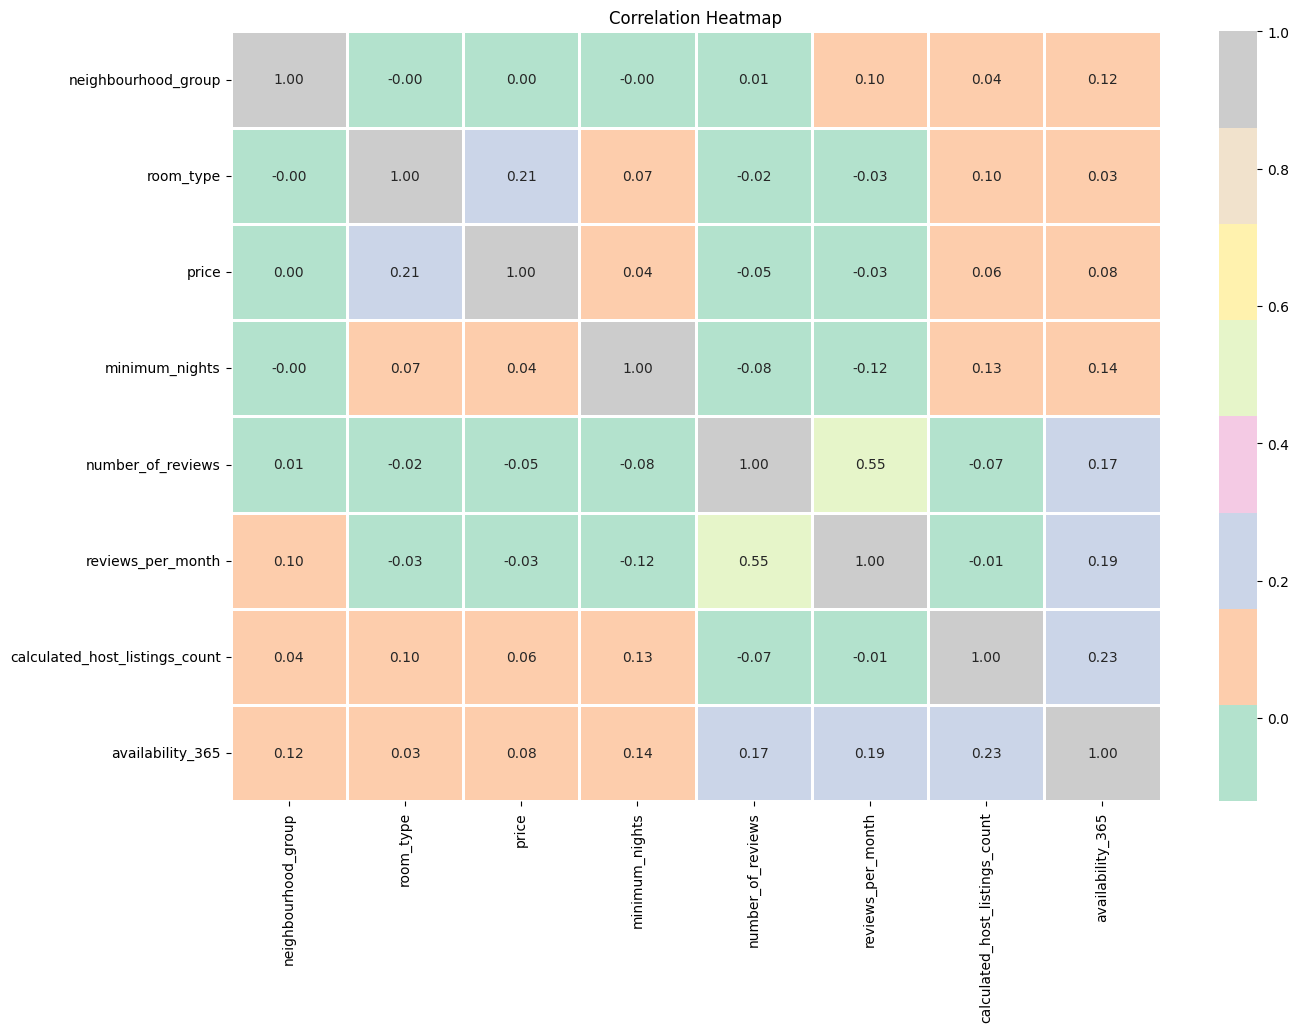

In [44]:
plt.figure(figsize=(15, 10))
df_m = df.drop(['last_review'], axis=1)
sns.heatmap(df_m.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()

### Conclusión:  
Como se observa en la matriz de correlación, la mayoría de las relaciones que existen entre las variables son correlaciondes débiles y las más significativas serían "number_of_reviews" y "reviews_per_month", tal vez, lo que tiene lógica sí se considerá que el número de comentarios varia según el mes.
Algo interesante de observar, es que el room_type y el price están débilmente correlacionadas, en otro caso se pensaría que podría ser una relación más significativa, probablemente tenga que ver con los valores atípicos.

### División de datos Train y Test

In [ ]:
from sklearn.model_selection import train_test_split

# Se divide el conjunto de datos
train, test = train_test_split(df, test_size = 0.2, random_state = 42)

print(len(train))
print(len(test))

39116
9779


## Paso 3. Guardar el conjunto de datos procesado.

In [52]:
# Se guarda la información en una ruta específica 

train_data = train.to_csv('../data/processed/airbnbny_clean_data_train.csv')
test_data = test.to_csv('../data/processed/airbnbny_clean_data_test.csv')